imagen del EDA

In [2]:
import pandas as pd
import glob
import re
import matplotlib.pyplot as plt
import folium
from geopy.geocoders import Nominatim
import pycountry

In [3]:
ruta_carpeta = r'C:\Users\julio\Bootcamp_DS\ONLINE_DS_THEBRIDGE_juliog\EDA_Entrega\src\data\data_comex'

In [4]:
archivos_csv = glob.glob(f"{ruta_carpeta}\\*.csv")

dataframes = [pd.read_csv(archivo, sep=';', encoding='latin1') for archivo in archivos_csv]

df = pd.concat(dataframes, ignore_index=True)

In [5]:
columnas_deseadas = ['flujo_codigo', 'periodo_anio', 'pais_nombre', 'taric', 'euros']
df = df[columnas_deseadas]

In [6]:
# Filtrar columnas, caracteres no numéricos y convertir columnas
df['euros'] = df['euros'].replace(',', '.', regex=True).astype(float)
df['periodo_anio'] = df['periodo_anio'].astype(int)
df['pais_nombre'] = df['pais_nombre'].astype(str)

In [7]:
df = df[df['periodo_anio'] != 2023]

In [8]:
valores_no_deseados = [
    'Avituallamiento terceros', 'Azores;O.Am.,Pal.;Kirib. (h.31/12/00)',
    'Países y territ.no prec.raz.com.Intra.;Código País Especial',
    'Países y territorios no determinados.Extraco.',
    'Países y territorios no determinados.Intraco.',
    'Avituall.y combust.intercambios comunitarios',
    'Avituallamiento y combustible',
    'Países y territorios no determinados',
    'Alta mar fuera de las aguas territoriales',
    'Pesca altura origen otro estado miembro',
    'Operaciones Especiales (España) (h.31/12/99)',
    'España (excp.Ceuta y Melilla)',
    'Países y territ.no prec.raz.com.Extra.',
    'Países y territ.no precisad.raz.com.mili.',
    'Pesca altura origen España',
    'Oc.Holand.; Oc.Neozeland. (h.31/12/00)',
    'Regiones Polares (h.31/12/00)',
    'Melilla'
]

# Eliminar los valores no deseados de la columna 'pais_nombre'
df = df[~df['pais_nombre'].isin(valores_no_deseados)]

In [9]:
# Diccionario de nombres a cambiar y su correspondiente valor 'correcto'
nombres_a_cambiar = {
    'Azores;O.Am.,Pal.;Kirib. (h.31/12/00)': 'Azores',
    'Burkina Faso (ant. Alto Volta)': 'Burkina Faso',
    'Camboya (Campuchea)': 'Camboya',
    'Corea del Norte (Rep.Pop.Dem.de Corea)': 'Corea del Norte',
    'Corea del Sur (Rep. de Corea)' :'Corea del Sur',
    'I.Marianas Norte;Oc.Australiana (h.31/12/00)': 'Islas Marianas',
    'Islas Fiyi(Fidji)': 'Islas Fiyi',
    'Islas Malvinas (Falkland)': 'Islas Malvinas',
    'Islas Virgenes (EEUU)': 'Islas Virgenes',
    'Islas Virgenes (GB)': 'Islas Virgenes',
    'Serbia y Montenegro (h.31/05/05)': 'Serbia',
    'Bélgica y Luxemburgo (h.31/12/98)': 'Bélgica',
    'Guadalupe (h.31/12/96)': 'Guadalupe',
    'Guyana Francesa (h.31/12/96)': 'Guyana Francesa',
    'Martinica (h.31/12/96)': 'Martinica',
    'Reunión (h.31/12/96)': 'Reunión',
    'Svalbard (archipiélago) (h.31/12/00)': 'Noruega',
    'Nueva Caledonia y dependencias' : 'Nueva Caledonia'
}

# Reemplazar los valores en la columna 'pais_nombre' con los valores del diccionario
df.loc[:, 'pais_nombre'] = df['pais_nombre'].replace(nombres_a_cambiar)

In [10]:
regiones = {
    'Europa': [
        'Albania', 'Alemania', 'Andorra', 'Armenia', 'Austria', 'Azerbaiyán', 'Bélgica', 'Bielorrusia', 'Bosnia-Herzegovina',
        'Bulgaria', 'Chipre', 'Ciudad del Vaticano', 'Croacia', 'Dinamarca', 'Eslovaquia', 'Eslovenia', 'España',
        'Estonia', 'Finlandia', 'Francia', 'Georgia', 'Gibraltar', 'Grecia', 'Hungría', 'Irlanda', 'Islandia', 'Italia',
        'Kazajistán', 'Kosovo', 'Letonia', 'Liechtenstein', 'Lituania', 'Luxemburgo', 'Macedonia del Norte', 'Malta',
        'Moldavia', 'Mónaco', 'Montenegro', 'Noruega', 'Países Bajos', 'Polonia', 'Portugal', 'Reino Unido', 'República Checa',
        'Rumanía', 'Rusia', 'San Marino', 'Serbia', 'Suecia', 'Suiza', 'Turquía', 'Ucrania', 'Bielorusia','Islas Feroe'
    ],
    'Asia': [
        'Afganistán', 'Arabia Saudí', 'Bangladesh', 'Baréin', 'Brunei Darussalam', 'Bután', 'Camboya', 'Catar', 'China',
        'Corea del Norte', 'Corea del Sur', 'Emiratos Árabes Unidos', 'Filipinas', 'Hong-Kong', 'India', 'Indonesia', 'Irak',
        'Irán', 'Israel', 'Japón', 'Jordania', 'Kazajistán', 'Kirguistán', 'Kuwait', 'Laos', 'Líbano', 'Macao', 'Malasia',
        'Maldivas', 'Mongolia', 'Myanmar', 'Nepal', 'Omán', 'Pakistán', 'Palestina', 'Singapur', 'Siria', 'Sri Lanka', 'Tailandia',
        'Taiwán', 'Tayikistán', 'Timor Oriental', 'Turkmenistán', 'Uzbekistán', 'Vietnam', 'Yemen', 'Islas Maldivas',
    'Islas Cocos o islas Keeling', 'Azerbaiján', 'Bahrein', 'Cisjordania/Franja de Gaza', 'Kazajstán', 'Qatar', 'Tajikistán', 'Timor-Leste'
    ],
    'América': [
        'Anguila', 'Antigua y Barbuda', 'Argentina', 'Aruba', 'Bahamas', 'Barbados', 'Belice', 'Bermudas', 'Bolivia',
        'Bonaire, San Eustaquio y Saba', 'Brasil', 'Canadá', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Curaçao',
        'Dominica', 'Ecuador', 'El Salvador', 'Estados Unidos', 'Granada', 'Guadalupe', 'Guatemala', 'Guyana', 'Guyana Francesa',
        'Haití', 'Honduras', 'Islas Caimán', 'Islas Malvinas', 'Islas Turcas y Caicos', 'Islas Vírgenes Británicas',
        'Islas Vírgenes de los Estados Unidos', 'Islas del Canal', 'Jamaica', 'Martinica', 'México', 'Montserrat', 'Nicaragua',
        'Panamá', 'Paraguay', 'Perú', 'Puerto Rico', 'República Dominicana', 'San Bartolomé', 'San Cristóbal y Nieves',
        'San Martín', 'San Pedro y Miquelón', 'Santa Lucía', 'San Vicente y las Granadinas', 'Sint Maarten', 'Surinam',
        'Trinidad y Tobago', 'Uruguay', 'Venezuela',
        'Anguilla', 'Antillas Neerlandesas', 'Groenlandia', 'Islas Malvinas', 'Islas Vírgenes', 'Islas Caimán',
        'Islas Turcas y Caicos', 'Islas Malvinas', 'Islas Falkland (Islas Malvinas)', 'Islas Vírgenes Británicas',
        'San Bartolomé', 'Sant Vicent y las Granadinas', 'Islas Vírgenes','San Vicente y Granadinas',
        'Georgia del Sur e Islas Sandwich del Sur','San Bartolomé','Islas Virgenes','Georgia del Sur e Islas Sandwich Sur','Sant Bartolomé'
    ],
    'África': [
        'Angola', 'Argelia', 'Benín', 'Botsuana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Camerún', 'Chad', 'Comoras',
        'Congo', 'Costa de Marfil', 'Djibouti', 'Egipto', 'Eritrea', 'Esuatini', 'Etiopía', 'Gabón', 'Gambia', 'Ghana',
        'Guinea', 'Guinea-Bissau', 'Guinea Ecuatorial', 'Kenia', 'Lesotho', 'Liberia', 'Libia', 'Madagascar', 'Malawi', 'Territorio Británico Indico',
        'Malí', 'Marruecos', 'Mauricio', 'Mauritania', 'Mayotte', 'Mozambique', 'Namibia', 'Níger', 'Nigeria', 'República Árabe Saharaui Democrática',
        'República Centroafricana', 'República del Congo', 'Reunión', 'Ruanda', 'Santo Tomé y Príncipe', 'Senegal', 'Seychelles',
        'Sierra Leona', 'Somalia', 'Sudáfrica', 'Sudán', 'Sudán del Sur', 'Tanzania', 'Togo', 'Túnez', 'Uganda', 'Yibuti', 'Territorio Británico del Océano Índico',
        'Zambia', 'Zimbabue','Benin', 'Botswana', 'Guinea Bissau', 'Mali', 'R.D. del Congo', 'Santa Elena', 'Swazilandia', 'Zimbabwe', 'Sáhara Occidental'
    ],
    'Oceanía': [
        'Australia', 'Estados Federados de Micronesia', 'Fiyi', 'Guam', 'Islas Cook', 'Islas Marshall', 'Islas Salomón',
        'Kiribati', 'Nauru', 'Nueva Caledonia', 'Nueva Zelanda', 'Niue', 'Norfolk', 'Palaos', 'Papúa Nueva Guinea',
        'Pitcairn', 'Polinesia Francesa', 'Samoa', 'Samoa Americana', 'Islas Cocos', 'Territorio Antártico Británico',
        'Timor Oriental', 'Tokelau', 'Tonga', 'Tuvalu', 'Vanuatu', 'Wallis y Futuna', 'Islas Fiyi', 'Islas Marianas', 
        'Islas Marianas del Norte', 'Islas Salomón', 'Islas Tokelau', 'Islas Salomon','Islas Wallis y Futuna','Palau','Samoa Occidental',
        'Islas Menores alejadas Estados Unidos','Isla de Navidad','Tierras Australes y Antárticas Francesas','Micronesia Estados Federados',
        'Isla Norfolk','Isla Niue','Isla Navidad'
    ],
    'Antártida': [
        'Antártida', 'Georgia del Sur e Islas Sandwich del Sur', 'Isla Bouvet', 'Isla de Navidad', 'Isla de San Martín',
        'Isla Heard e Islas McDonald', 'Islas Åland', 'Islas Malvinas', 'Islas Pitcairn', 'Islas Svalbard y Jan Mayen',
        'Islas menores alejadas de los Estados Unidos', 'Islas Vírgenes de los Estados Unidos', 'Islas del Canal',
        'Islas Åland', 'Kosovo', 'República Árabe Saharaui Democrática', 'San Bartolomé', 'San Martín', 'Santa Elena, Ascensión y Tristán de Acuña',
        'Svalbard y Jan Mayen', 'Territorio Británico del Océano Índico', 'Tierras Australes y Antárticas Francesas','Tierras Australes Francesas'
    ]
}

In [11]:
def asignar_region(pais):
    for region, paises_region in regiones.items():
        if pais in paises_region:
            return region
    return None  # En caso de que el país no esté en ninguna región especificada

df['region'] = df['pais_nombre'].apply(asignar_region)


In [12]:
# Este es el DF principal para la cuenta corriente, a partir del cual haremos los cálculos
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 579831 entries, 0 to 611742
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   flujo_codigo  579831 non-null  object 
 1   periodo_anio  579831 non-null  int32  
 2   pais_nombre   579831 non-null  object 
 3   taric         579831 non-null  int64  
 4   euros         579831 non-null  float64
 5   region        579831 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 28.8+ MB


**Dataset:**  
df
 
**Descripción:**  
Datos sobre el comercio exterior en España  

**Periodo:**  
1995 - 2022

|Columna/Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
|flujo_codigo|Nos indica si se trata de una Exportación o una Importación|Categórica nominal|0|||
|periodo_anio|Nos indica el año|Numérica discreta|2|||
|pais_nombre|Nos indica el país con el que se hizo la transacción|Categórica nominal|1|||
|taric|Nos indica el código arancelario de la mercancía|Categórica nominal|2|||
|euros|Nos indica el valor en euros de la mercancía|Numérica contínua|0|||
|region|Nos indica el continente|Categórica nominal|2|||

In [46]:
moda_pais_nombre = df['pais_nombre'].mode()[0]
print("El país con el que más transacciones se ha hecho:", moda_pais_nombre)


El país con el que más transacciones se ha hecho: Francia


In [47]:
menos_comun = df['pais_nombre'].value_counts().idxmin()
print("El país con el que menos transacciones se ha hecho:", menos_comun)


El país menos común en la columna 'pais_nombre' es: Islas Marianas


In [56]:
fila_max_euros_flujo_I = df[df['flujo_codigo'] == 'I'].loc[df[df['flujo_codigo'] == 'I']['euros'].idxmax()]

print('La importación que mas valor ha tenido en el dataset es:')
print(fila_max_euros_flujo_I[['periodo_anio', 'pais_nombre', 'taric', 'euros', 'flujo_codigo']])


La importación que mas valor ha tenido en el dataset es:
periodo_anio              2022
pais_nombre     Estados Unidos
taric                       27
euros           15983207950.83
flujo_codigo                 I
Name: 561788, dtype: object


La importación mas valorada fue en 2022, de EEUU, y se importaron COMBUSTIBLES

In [60]:
fila_max_euros_flujo_E = df[df['flujo_codigo'] == 'E'].loc[df[df['flujo_codigo'] == 'E']['euros'].idxmax()]

print('La exportación que mas valor ha tenido en el dataset es:')
print(fila_max_euros_flujo_E[['periodo_anio', 'pais_nombre', 'taric', 'euros', 'flujo_codigo']])


La exportación que mas valor ha tenido en el dataset es:
periodo_anio                  2022
pais_nombre                Bélgica
taric                           30
euros           12606698604.549999
flujo_codigo                     E
Name: 288005, dtype: object


La exportación mas valorada fue en 2022, a BELGICA, y se exportaron PRODUCTOS FARMACEUTICOS

In [13]:
df_total_flujo_codigo = df.groupby('flujo_codigo')['euros'].sum().reset_index()

# Transponer el DataFrame
df_total_balanza_comercial = df_total_flujo_codigo.T

# Establecer la primera fila como los nombres de las columnas
nuevos_nombres_columnas = df_total_balanza_comercial.iloc[0]
df_total_balanza_comercial = df_total_balanza_comercial[1:]
df_total_balanza_comercial.columns = nuevos_nombres_columnas

# Convertir las columnas 'E' e 'I' a tipo numérico
df_total_balanza_comercial['E'] = pd.to_numeric(df_total_balanza_comercial['E'])
df_total_balanza_comercial['I'] = pd.to_numeric(df_total_balanza_comercial['I'])

# Calcular la diferencia entre 'E' e 'I' y añadir una nueva columna
df_total_balanza_comercial['Saldo_balanza_comercial'] = df_total_balanza_comercial['E'] - df_total_balanza_comercial['I']

# Mostrar el DataFrame transpuesto con la diferencia calculada
df_total_balanza_comercial

flujo_codigo,E,I,Saldo_balanza_comercial
euros,5.274093e+12,6.551530e+12,-1.277437e+12


**df_total_balanza_comercial**  
Este dataframe nos muestra que el valor de las transacciones realizadas en España entre 1995 y 2022 es negativo, por lo que España ha importado bienes por más valor de los que los ha exportado

Aquí se muestra gráficamente el valor de todas las importaciones/exportaciones

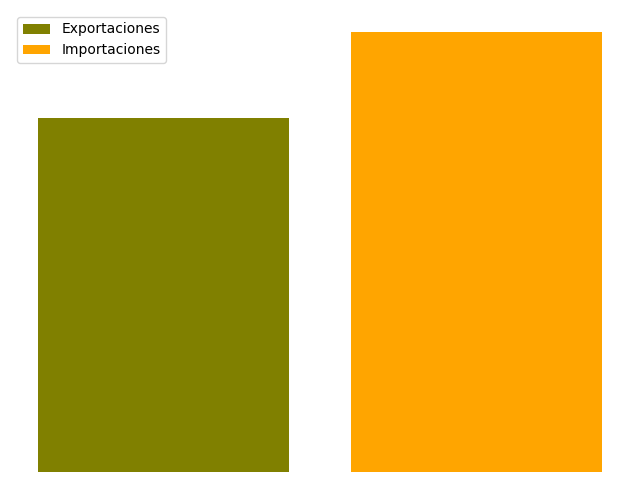

In [14]:
# Graficar los datos
plt.figure(figsize=(8, 6))  # Tamaño del gráfico

# Crear el gráfico de barras para 'E' (Exportaciones)
plt.bar('Exportaciones', df_total_balanza_comercial['E'], color='olive', label='Exportaciones')

# Crear el gráfico de barras para 'I' (Importaciones)
plt.bar('Importaciones', df_total_balanza_comercial['I'], color='orange', label='Importaciones')

# Ocultar ejes y etiquetas
plt.axis('off')  # Oculta los ejes
plt.tick_params(left=False, bottom=False)  # Oculta los ticks

# Mostrar el gráfico
plt.legend()
plt.show()


In [61]:
# Agrupar por 'flujo_codigo' y 'periodo_anio' y sumar los valores de 'euros'
df_total_flujo_codigo_anio = df.groupby(['flujo_codigo', 'periodo_anio'])['euros'].sum().reset_index()

# Utilizar pivot para convertir los valores de 'flujo_codigo' en columnas
pivot_df = df_total_flujo_codigo_anio.pivot(index='periodo_anio', columns='flujo_codigo', values='euros').reset_index()

# Establecer 'periodo_anio' como el nuevo índice
pivot_df.set_index('periodo_anio', inplace=True)
pivot_df.index.name = None

pivot_df['diferencia_E_I'] = pivot_df['E'] - pivot_df['I']

pivot_df

flujo_codigo,E,I,diferencia_E_I
1995,6.928004e+10,8.713251e+10,-1.785248e+10
1996,7.727814e+10,9.417237e+10,-1.689423e+10
1997,9.226933e+10,1.094676e+11,-1.719825e+10
1998,9.873874e+10,1.228560e+11,-2.411723e+10
1999,1.034699e+11,1.390929e+11,-3.562292e+10
2000,1.219018e+11,1.694669e+11,-4.756513e+10
2001,1.275642e+11,1.732101e+11,-4.564588e+10
2002,1.313357e+11,1.752651e+11,-4.392938e+10
2003,1.358451e+11,1.850758e+11,-4.923073e+10
2004,1.442792e+11,2.083650e+11,-6.408577e+10


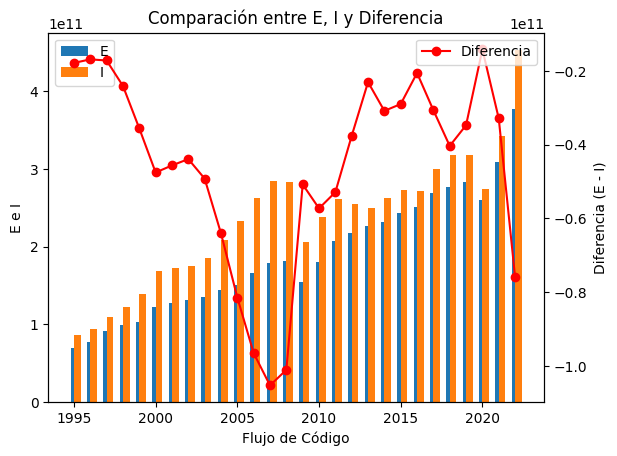

In [16]:
# Crear la figura y los ejes
fig, ax1 = plt.subplots()

# Crear barras para E e I usando el índice como las etiquetas del eje x
ax1.bar(pivot_df.index, pivot_df['E'], width=0.4, align='center', label='E')
ax1.bar(pivot_df.index, pivot_df['I'], width=0.4, align='edge', label='I')

# Configurar el eje y (ax1)
ax1.set_ylabel('E e I')
ax1.set_xlabel('Flujo de Código')
ax1.legend()

# Crear un segundo eje (ax2) para la diferencia
ax2 = ax1.twinx()
ax2.plot(pivot_df.index, pivot_df['diferencia_E_I'], marker='o', linestyle='-', color='r', label='Diferencia')
ax2.set_ylabel('Diferencia (E - I)')
ax2.legend(loc='upper right')

# Mostrar el gráfico
plt.title('Comparación entre E, I y Diferencia')
plt.show()

En este gráfico podemos ver como el saldo de la balanza comercial ha sido negativo en todo el periodo de estudio (eje derecho), si bien no se llega a los niveles de 2007, se puede observar que esa diferencia año a año se hace más grande

In [27]:
# Agrupar por 'flujo_codigo' y 'periodo_anio' y sumar los valores de 'euros'
df_total_flujo_codigo_anio = df.groupby(['flujo_codigo', 'region'])['euros'].sum().reset_index()

# Utilizar pivot para convertir los valores de 'flujo_codigo' en columnas
pivot_df = df_total_flujo_codigo_anio.pivot(index='region', columns='flujo_codigo', values='euros').reset_index()

# Establecer 'periodo_anio' como el nuevo índice
pivot_df.set_index('region', inplace=True)
pivot_df.index.name = None

pivot_df['diferencia_E_I'] = pivot_df['E'] - pivot_df['I']

pivot_df

flujo_codigo,E,I,diferencia_E_I
América,5.603706e+11,6.881238e+11,-1.277533e+11
Antártida,1.201817e+07,8.335744e+06,3.682430e+06
Asia,4.236054e+11,1.177453e+12,-7.538481e+11
Europa,3.959668e+12,4.126369e+12,-1.667010e+11
Oceanía,3.529682e+10,2.271962e+10,1.257720e+10
África,2.951399e+11,5.368554e+11,-2.417155e+11


En este DF podemos observar como el saldo es negativo con las principales continentes con los que comerciamos

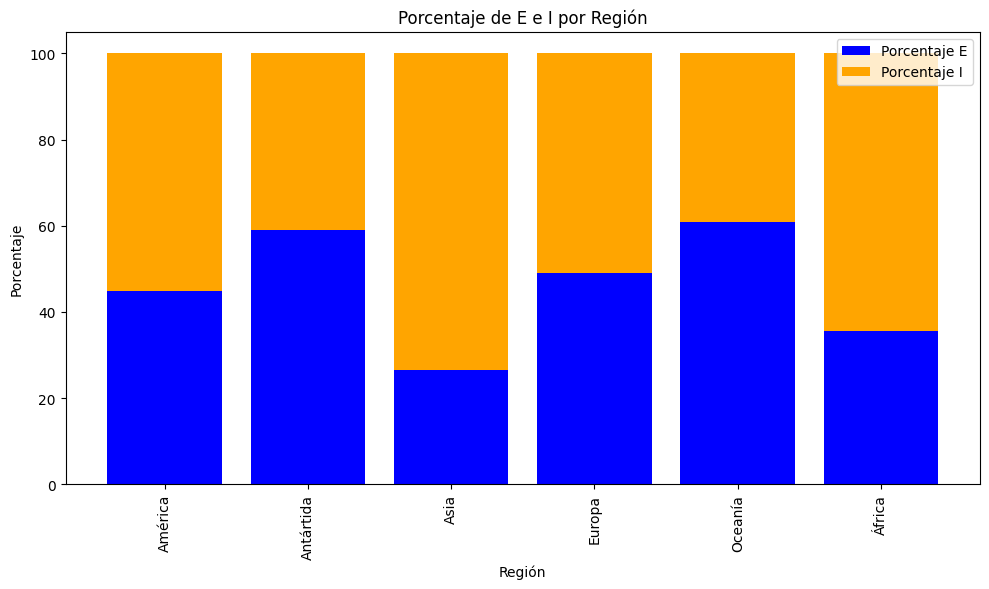

In [28]:
import matplotlib.pyplot as plt

# Calcular el total de E + I y los porcentajes de E e I
pivot_df['total'] = pivot_df['E'] + pivot_df['I']
pivot_df['porcentaje_E'] = (pivot_df['E'] / pivot_df['total']) * 100
pivot_df['porcentaje_I'] = (pivot_df['I'] / pivot_df['total']) * 100

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))

# Barras para los porcentajes de E e I
plt.bar(pivot_df.index, pivot_df['porcentaje_E'], label='Porcentaje E', color='blue')
plt.bar(pivot_df.index, pivot_df['porcentaje_I'], bottom=pivot_df['porcentaje_E'], label='Porcentaje I', color='orange')

plt.xlabel('Región')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de E e I por Región')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Podemos ver que la mayor diferencia porcentual entre EXP e IMP se da en ASIA, importamos mucho más de lo que exportamos

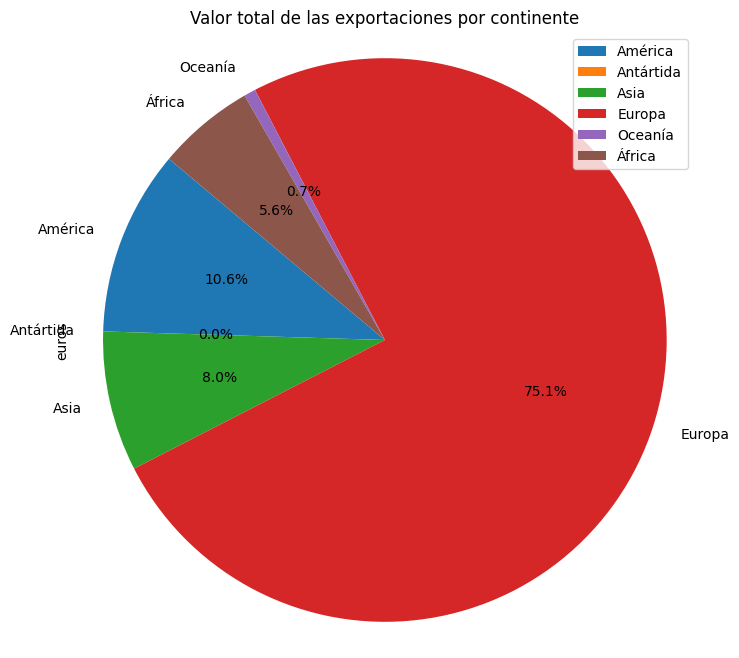

In [21]:
df_region = df[df['flujo_codigo'] == 'E'].groupby('region')['euros'].sum()

# Crear un gráfico circular con las sumas de euros por región
plt.figure(figsize=(8, 8))
df_region.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Valor total de las exportaciones por continente')
plt.axis('equal')  # Para asegurar que el gráfico sea un círculo
plt.legend(loc='best')  # Mostrar la leyenda en la mejor posición
plt.show()

Podemos observar que el 75% de las EXP las hacemos a EUROPA  
AMERICA (norte y sur) supone un 10%   
ASIA es el tercero, con un 8%

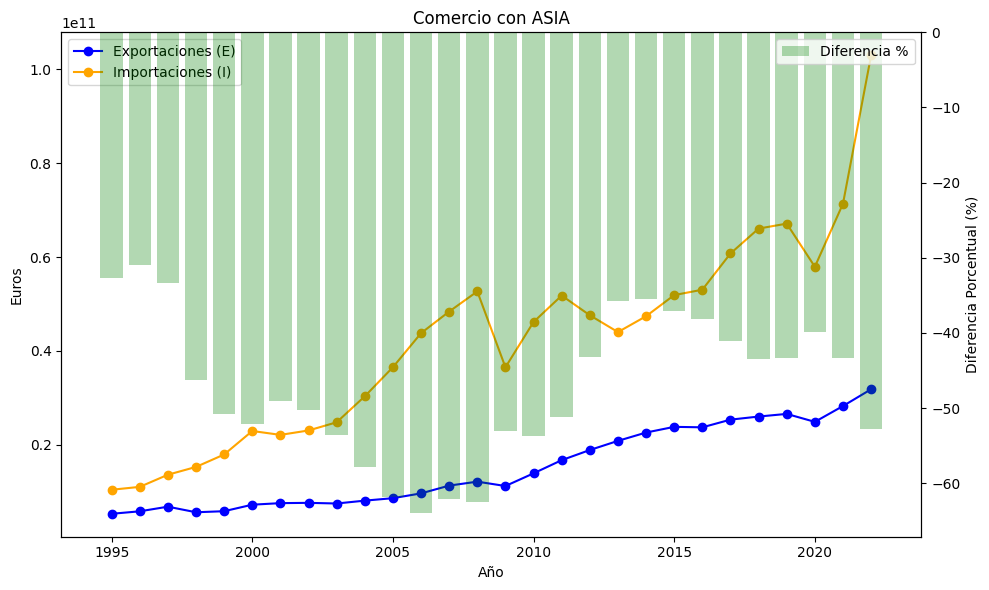

In [34]:
import matplotlib.pyplot as plt

# Filtrar el DataFrame por región y los flujos códigos 'E' e 'I'
df_asia = df[(df['region'] == 'Asia') & df['flujo_codigo'].isin(['E', 'I'])]

# Crear un DataFrame pivote para los flujos códigos 'E' e 'I' por año
pivot_asia = df_asia.pivot_table(index='periodo_anio', columns='flujo_codigo', values='euros', aggfunc='sum').reset_index()

# Calcular la diferencia porcentual entre exportaciones e importaciones
pivot_asia['diferencia_porcentual'] = ((pivot_asia['E'] - pivot_asia['I']) / pivot_asia[['E', 'I']].sum(axis=1)) * 100

# Crear el gráfico de barras y líneas combinadas
fig, ax1 = plt.subplots(figsize=(10, 6))

# Graficar las exportaciones e importaciones
ax1.plot(pivot_asia['periodo_anio'], pivot_asia['E'], marker='o', linestyle='-', color='blue', label='Exportaciones (E)')
ax1.plot(pivot_asia['periodo_anio'], pivot_asia['I'], marker='o', linestyle='-', color='orange', label='Importaciones (I)')
ax1.set_xlabel('Año')
ax1.set_ylabel('Euros')
ax1.set_title('Comercio con ASIA')
ax1.legend(loc='upper left')

# Crear un segundo eje para las barras de diferencia porcentual
ax2 = ax1.twinx()
ax2.bar(pivot_asia['periodo_anio'], pivot_asia['diferencia_porcentual'], color='green', alpha=0.3, label='Diferencia %')
ax2.set_ylabel('Diferencia Porcentual (%)')
ax2.legend(loc='upper right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()



En este gráfico podemos ver como han evolucionado las exportaciones e importaciones al continente asiático, es de destacar el incremento de las importaciones a partir del COVID, las exportaciones tambien están incrementando, eso si, a menor ritmo

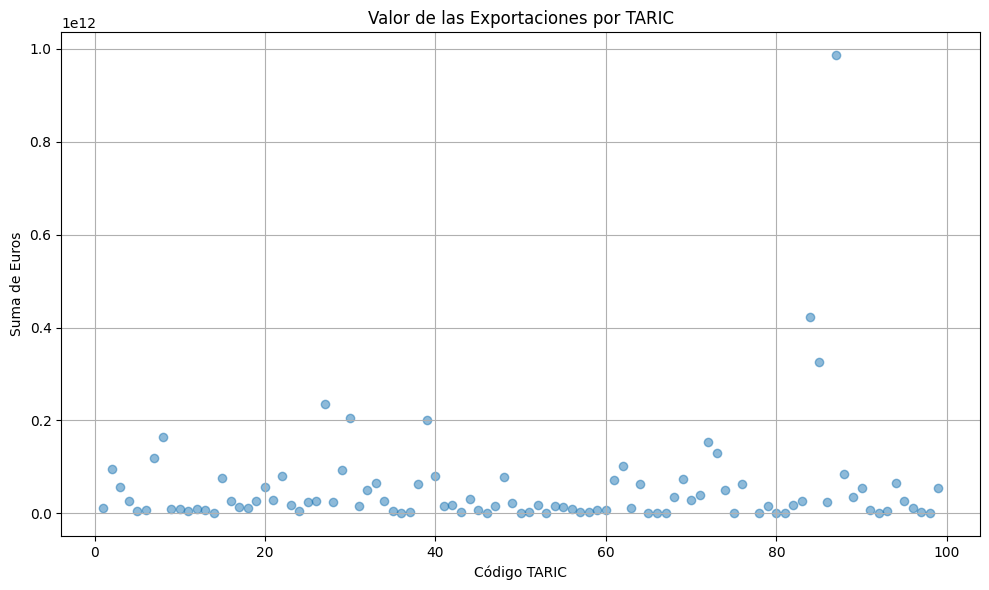

In [37]:
# Filtrar el DataFrame por exportaciones (flujo_codigo = 'E')
exportaciones = df[df['flujo_codigo'] == 'E']

# Calcular la suma de euros por código TARIC
suma_euros_por_taric = exportaciones.groupby('taric')['euros'].sum()

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(suma_euros_por_taric.index, suma_euros_por_taric.values, alpha=0.5)
plt.xlabel('Código TARIC')
plt.ylabel('Suma de Euros')
plt.title('Valor de las Exportaciones por TARIC')
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Este gráfico de dispersión muestra el valor total de los bienes desde 1995.  
Podemos ver 3 principales outliers, los 3 bienes que más se exportan desde España.  
Estos outliers son:   
1 - Código TARIC 87: Vehículos  
2 - Código TARIC 84: Máquinas y aparatos mecánicos  
3 - Código TARIC 85: Aparatos y material eléctrico  

Vamos  ver como se comportan estas exportaciones hacia ASIA

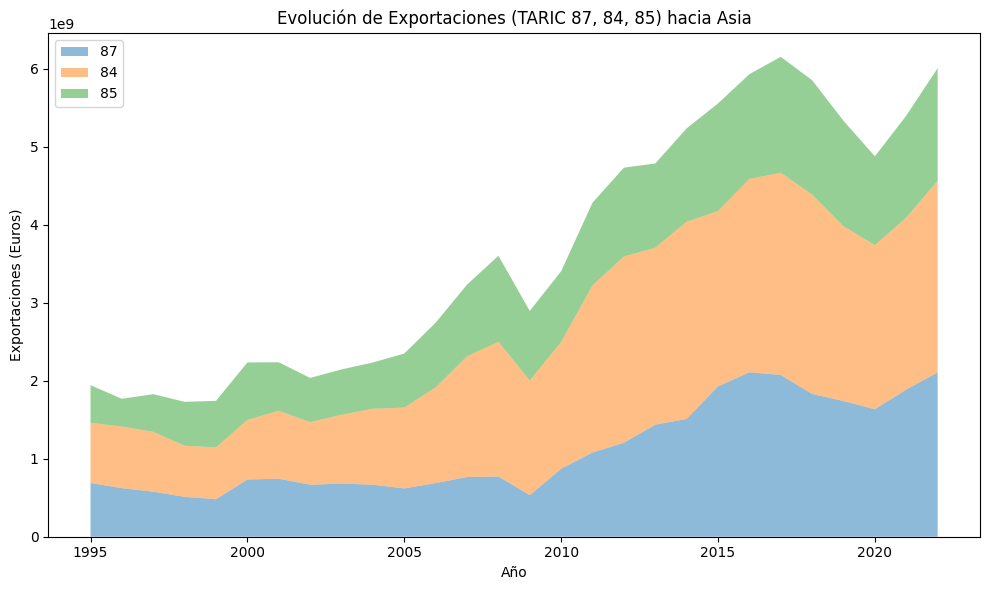

In [41]:
# Filtrar el DataFrame por exportaciones (flujo_codigo = 'E') hacia Asia (region = 'ASIA') y los códigos TARIC 87, 84, 85
export_asia_taric = df[(df['flujo_codigo'] == 'E') & (df['region'] == 'Asia') & (df['taric'].isin([87, 84, 85]))]

# Crear un DataFrame pivote para los códigos TARIC 87, 84, 85 por año
pivot_export_asia = export_asia_taric.pivot_table(index='periodo_anio', columns='taric', values='euros', aggfunc='sum').fillna(0)

# Crear el gráfico de área
plt.figure(figsize=(10, 6))
plt.stackplot(pivot_export_asia.index, pivot_export_asia[87], pivot_export_asia[84], pivot_export_asia[85],
              labels=['87', '84', '85'], alpha=0.5)
plt.xlabel('Año')
plt.ylabel('Exportaciones (Euros)')
plt.title('Evolución de Exportaciones (TARIC 87, 84, 85) hacia Asia')
plt.legend(loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Las exportaciones muestran una tendencia general al alza, sin embargo, se observan interrupciones notables en dos períodos específicos:   -Crisis financiera del 2008.  
-Dandemia de COVID-19 en 2019.  
Estos eventos parecen haber afectado significativamente el flujo y crecimiento de las exportaciones hacia Asia.  
Si bien es cierto, se han recuperado los niveles previos a la pandemia.